# DATA SCRAPING WITH TWEEPY:
Make sure i have a Twitter Developer account and my API Keys ready

In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
API_KEY='v8uvnH8eFTQfjo2pySBXIP2Ek'
API_SECRET='hKph1w34EOvLT9Mv1sJkTc7rBjD2cVKL9f4qmWvZmPE2WQrH92'
ACCESS_TOKEN='1862511905958510592-UK7dBas389a2ZIafTabeqC3WH7Ti4K' 
ACCESS_SECRET='5iAA2zykNzx8mdJmfrh5PAXKQ7MdOSt392H3qNzw462qf'


In [3]:
#Authenticate to Twitter
auth=tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api=tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
import requests
import pandas as pd

# Twitter API Bearer Token
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAHMHxQEAAAAAOxoR99X0GOKiCctU63RAVupskms%3DCCHaMSck5WGLHaHgqvRKxxjGm2pzwJdhKJ8JPsZiO1NtMz3TRv'  # Replace with your actual Bearer Token

def create_headers(bearer_token):
    headers = {"Authorization": f"Bearer {bearer_token}"}
    return headers

def search_tweets(query, max_results=100):
    url = f"https://api.twitter.com/2/tweets/search/recent?query={query}&max_results={max_results}"
    headers = create_headers(BEARER_TOKEN)
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}, {response.text}")
        raise Exception(f"Error: {response.status_code}, {response.text}")

# Example: Search for tweets containing the keyword "stocks"
if __name__ == "__main__":
    query = 'stocks'
    try:
        tweets_data = search_tweets(query)
        tweets = tweets_data.get('data', [])
        df = pd.DataFrame(tweets)
        df.to_csv('tweets.csv', index=False)
        print("Tweets saved to tweets.csv")
    except Exception as e:
        print(e)

Error: 429, {"account_id":1862516107690516480,"product_name":"standard-basic","title":"UsageCapExceeded","period":"Monthly","scope":"Product","detail":"Usage cap exceeded: Monthly product cap","type":"https://api.twitter.com/2/problems/usage-capped"}
Error: 429, {"account_id":1862516107690516480,"product_name":"standard-basic","title":"UsageCapExceeded","period":"Monthly","scope":"Product","detail":"Usage cap exceeded: Monthly product cap","type":"https://api.twitter.com/2/problems/usage-capped"}


In [5]:
data=pd.read_csv('tweets.csv')
data.tail(10)

,edit_history_tweet_ids,text,id
90,['1862856562680741979'],Some Chemical Stocks now looking interesting \...,1862856562680741979
91,['1862856554929668503'],RT @8_24Mamba4Ever: Kobe Bryant’s Era 🐍♾️\n\n ...,1862856554929668503
92,['1862856551385694448'],9632 スバル興業(株)\n-49(-1.67%) \n２５年３月期は３７％営業増益で４円...,1862856551385694448
93,['1862856546990043396'],@bkaellner @chriswmayer @Quartr_App Also follo...,1862856546990043396
94,['1862856534654333172'],RT @Chris_Sain: Personal Finance Tip: Anytime ...,1862856534654333172
95,['1862856532871786656'],Discover all you need to know about the uraniu...,1862856532871786656
96,['1862856524114047357'],"Since 1996, Berkshire Hathaway $BRKA $BRKB is ...",1862856524114047357
97,['1862856490232451573'],RT @RakJhun: Manish Chokhani says PSU Bank sto...,1862856490232451573
98,['1862856482225873029'],@FromValue I came across a stock investment an...,1862856482225873029
99,['1862856474621350329'],Stocks up more than 10% in November 2024 -\n\n...,1862856474621350329


# Preprocessing and Sentimental Analysis:
Process the scraped tweets and perform sentiment analysis

In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
from textblob import TextBlob
import re

In [8]:
print(data.columns)

Index(['edit_history_tweet_ids', 'text', 'id'], dtype='object')


In [9]:
# Function to clean tweets
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)    # Remove mentions
    tweet = re.sub(r'#', '', tweet)       # Remove hashtags
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)  # Remove special characters
    return tweet.strip()

# Add sentiment analysis
def analyze_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment.polarity
    return sentiment

data['Cleaned_Tweet'] = data['text'].apply(clean_tweet)
data['Sentiment'] = data['Cleaned_Tweet'].apply(analyze_sentiment)

# Save processed data
data.to_csv('processed_tweets.csv', index=False)
print("Processed tweets with sentiment saved to processed_tweets.csv")


Processed tweets with sentiment saved to processed_tweets.csv


In [10]:
print(data[['text', 'Cleaned_Tweet', 'Sentiment']].head())

                                                text  \
0  RT @TradingMarvel: 10th stock out of 10 portfo...   
1  @NFTfafafa I came across a stock investment an...   
2  4243 (株)ニックス \n+3(0.44%)\n24年11月末株主から特別株主優待制度を...   
3  I just really love $ET stock it’s such a mover...   
4  Uncle Sham could've and should've invested Soc...   

                                       Cleaned_Tweet  Sentiment  
0  RT  th stock out of  portfolio stocks list is\...   0.000000  
1  I came across a stock investment analyst by ch...   0.257121  
2                                                      0.000000  
3  I just really love ET stock its such a mover l...   0.150000  
4  Uncle Sham couldve and shouldve invested Socia...  -0.038889  


# Building a Machine Learning Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [12]:
print(data.columns)

Index(['edit_history_tweet_ids', 'text', 'id', 'Cleaned_Tweet', 'Sentiment'], dtype='object')


In [13]:
def sentiment_category(score):
    if score > 0.1:
        return 2  # Positive
    elif score < -0.1:
        return 0  # Negative
    else:
        return 1  # Neutral

In [14]:
# Apply the function to create the Target column
data['Target'] = data['Sentiment'].apply(sentiment_category)

# Check distribution of categories
print(data['Target'].value_counts())  # Counts of each category

2    52
1    42
0     6
Name: Target, dtype: int64


In [15]:
X=data[['Sentiment']] #Features
y=data['Target']

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 80, Test samples: 20


In [17]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         8
    Positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



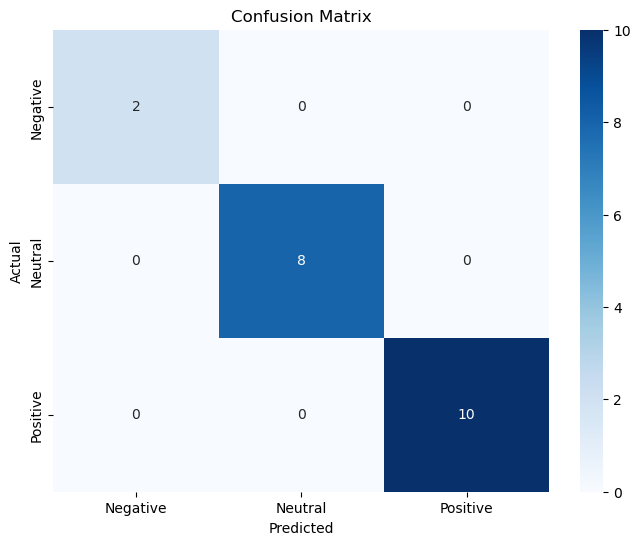

In [18]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


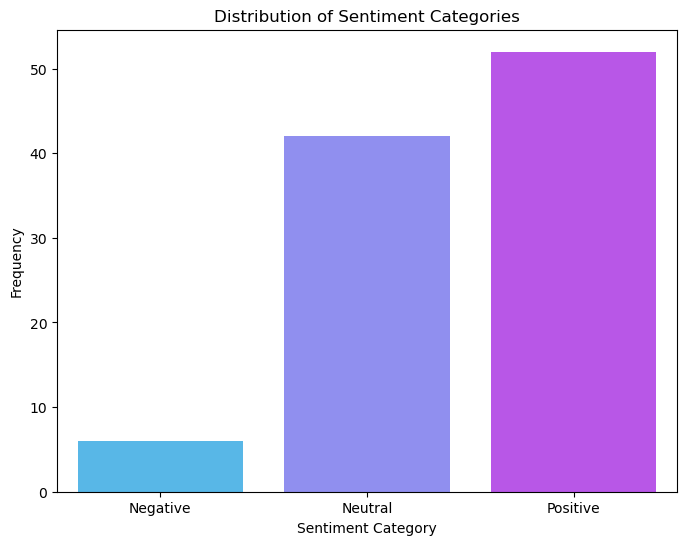

In [19]:
#Sentiment Distribution
# Plot distribution of Target (sentiment categories)
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data, palette='cool', order=[0, 1, 2])
plt.title("Distribution of Sentiment Categories")
plt.xlabel("Sentiment Category")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()


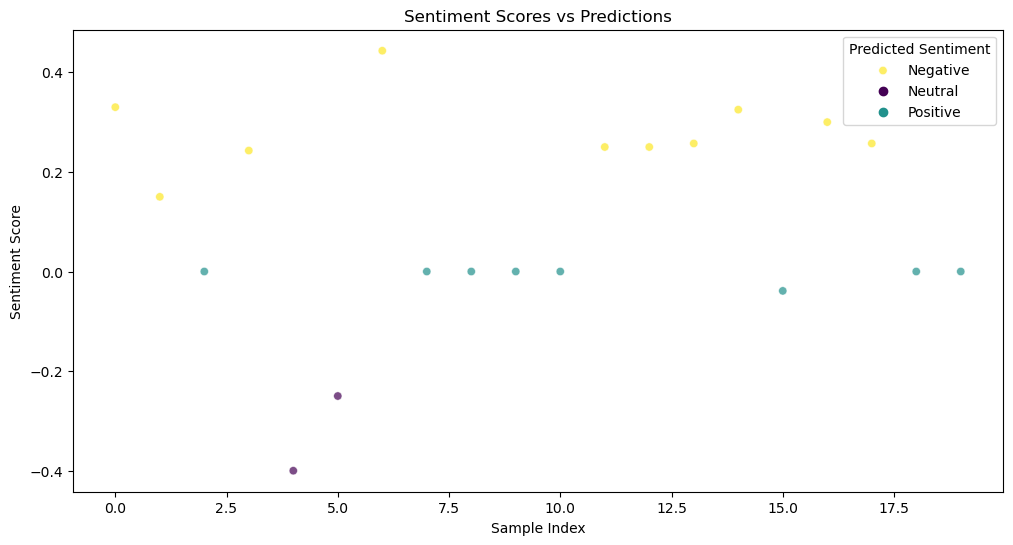

In [20]:
# Scatter plot of Sentiment scores and predictions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(y_test)), y=X_test['Sentiment'], hue=y_pred, palette='viridis', alpha=0.7)
plt.title("Sentiment Scores vs Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment Score")
plt.legend(title="Predicted Sentiment", labels=["Negative", "Neutral", "Positive"])
plt.show()

# Model Complexity Control
Overfitting may occur because the model memorizes training data due to its complexity. Here's how to mitigate it:
Reduce Random Forest Complexity
   1. Limit the depth of trees in the Random Forest model.
   2. Control the number of features considered at each split.

In [21]:
model1 = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Limit the depth of each tree
    max_features='sqrt',  # Consider a subset of features at each split
    random_state=42
)

# Balance the Dataset
Check for class imbalance in the target variable (Target). An imbalanced dataset can skew predictions.

2    52
1    42
0     6
Name: Target, dtype: int64


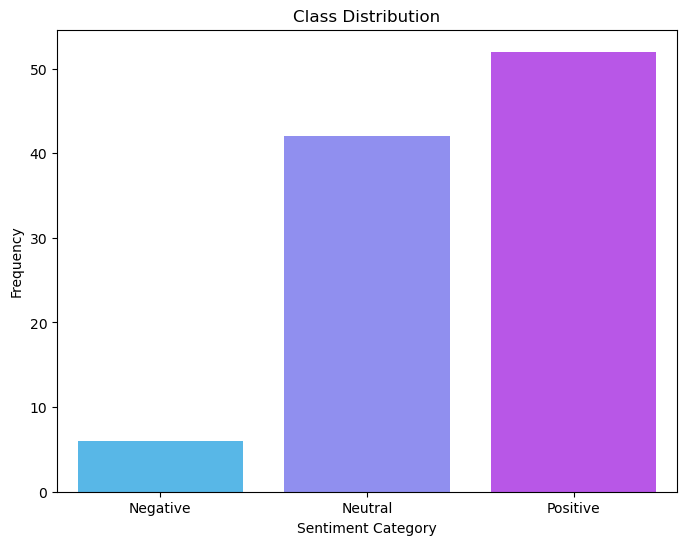

In [22]:
# Check class distribution
print(data['Target'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data, palette='cool', order=[0, 1, 2])
plt.title("Class Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'])
plt.show()

# Apply Class Balancing (Oversampling or Undersampling)
Use techniques like SMOTE (Synthetic Minority Oversampling Technique) or downsampling.

In [23]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Resampled Class Distribution:\n{pd.Series(y_resampled).value_counts()}")


Resampled Class Distribution:
1    52
2    52
0    52
Name: Target, dtype: int64


# Use Cross-Validation
To validate the model on unseen data, use k-fold cross-validation.

In [24]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [1.         0.96774194 1.         1.         1.        ]
Mean CV Accuracy: 0.99


# Reevaluate the Model
Train and evaluate the model with adjustments.

In [25]:
# Train the adjusted Random Forest model
model1.fit(X_train, y_train)

# Predict and evaluate
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Adjusted Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Adjusted Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         8
    Positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Add Random Noise
If the dataset is small or overly clean, inject random noise into the training data to simulate variability.

In [26]:
import numpy as np

# Add noise to Sentiment scores in the training set
X_train_noisy = X_train.copy()
X_train_noisy['Sentiment'] += np.random.normal(0, 0.05, size=X_train.shape[0])  # Add small random noise

# Retrain the model on noisy data
model1.fit(X_train_noisy, y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Adjusted Model Accuracy: {accuracy:.2f}")

Adjusted Model Accuracy: 0.95


In [27]:
import numpy as np

# Add random noise to the Sentiment scores
data['Noisy_Sentiment'] = data['Sentiment'] + np.random.normal(0, 0.05, size=len(data))  # Adjust the standard deviation as needed

# Clip the noisy sentiment scores to keep them within valid range (-1 to 1)
data['Noisy_Sentiment'] = data['Noisy_Sentiment'].clip(-1, 1)


In [28]:
def classify_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
data['Sentiment_Label'] = data['Noisy_Sentiment'].apply(classify_sentiment)

# Display the first few rows
print(data[['Noisy_Sentiment', 'Sentiment_Label']].head())


   Noisy_Sentiment Sentiment_Label
0        -0.068345         Neutral
1         0.321187        Positive
2         0.034967         Neutral
3         0.066505         Neutral
4        -0.072700         Neutral


Sentiment Distribution:
 Positive    52
Neutral     42
Negative     6
Name: Sentiment_Label, dtype: int64


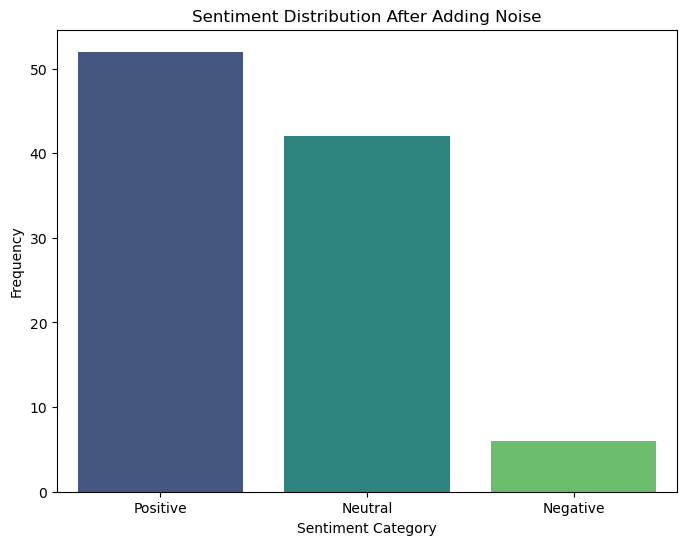

In [29]:
# Count the sentiment categories
sentiment_counts = data['Sentiment_Label'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Label', data=data, palette='viridis', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution After Adding Noise")
plt.xlabel("Sentiment Category")
plt.ylabel("Frequency")
plt.show()


In [30]:
# Use the noisy sentiment as the feature
X = data[['Noisy_Sentiment']]  # Feature
y = data['Sentiment_Label']    # Target (Categorical: 'Positive', 'Neutral', 'Negative')

# Convert categorical labels to numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode 'Positive', 'Neutral', 'Negative' as integers


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model3.fit(X_train, y_train)

# Predict and evaluate
y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)

print(f"Model Accuracy with Noisy Sentiment: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred3, target_names=label_encoder.classes_))


Model Accuracy with Noisy Sentiment: 1.00
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         2
     Neutral       1.00      1.00      1.00         8
    Positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Advanced Sentiment Analysis With VADER
The VADER (Valence Aware Dictionary and Sentiment Reasoner) library is well-suited for social media data

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
def vader_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)
    return sentiment['compound']  # Use compound score for overall sentiment

data['VADER_Sentiment'] = data['Cleaned_Tweet'].apply(vader_sentiment)

# Save the updated data
data.to_csv('tweets_with_vader_sentiment.csv', index=False)
print("VADER sentiment added and saved to tweets_with_vader_sentiment.csv")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gavya\AppData\Roaming\nltk_data...


VADER sentiment added and saved to tweets_with_vader_sentiment.csv


# Integrating Historical Stock Data
To Correlate tweets with stock prices, use historical stock data from sources like Yahoo Finance

In [35]:
pip install yfinance

     ------------------------------------ 102.2/102.2 kB 652.5 kB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 948.2/948.2 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 64.9/64.9 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=73bbb1b9ed474fffbbf5211c1f30d9d2c592ce78253f8c39c5194a1022ddb211
  Stored in directory: c:\users\gavya\appdata\local\pip\cache\wheels\06\b3\7f\ed42a7c83ad89f578928833f5789212c694a015b

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [38]:
import yfinance as yf

# Fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data[['Close']]  # Use the closing price for trends

# Example: Fetch data for Apple Inc. (AAPL)
stock_data = get_stock_data('AAPL', '2024-01-01', '2024-12-5')
stock_data.reset_index(inplace=True)
print(stock_data.tail())


[*********************100%***********************]  1 of 1 completed

Price        Date       Close
Ticker                   AAPL
229    2024-11-27  234.929993
230    2024-11-29  237.330002
231    2024-12-02  239.589996
232    2024-12-03  242.649994
233    2024-12-04  243.009995


In [40]:
print(data.columns)

Index(['edit_history_tweet_ids', 'text', 'id', 'Cleaned_Tweet', 'Sentiment',
       'Target', 'Noisy_Sentiment', 'Sentiment_Label', 'VADER_Sentiment'],
      dtype='object')


In [42]:
import pandas as pd
from datetime import datetime, timedelta

# Generate sequential timestamps for each tweet
start_time = datetime(2024, 1, 1, 12, 0, 0)  # Example start time
data['Timestamp'] = [start_time + timedelta(minutes=i) for i in range(len(data))]

# Convert to date for aggregation
data['Date'] = pd.to_datetime(data['Timestamp']).dt.date


In [43]:
data['Timestamp'] = pd.date_range(start="2024-01-01", periods=len(data), freq="T")  # Simulate timestamps (1-min intervals)
data['Date'] = data['Timestamp'].dt.date

In [44]:
# Average sentiment per day
daily_sentiment = data.groupby('Date')['Sentiment'].mean().reset_index()
print(daily_sentiment.head())


         Date  Sentiment
0  2024-01-01   0.171482


# Merging Sentiment Data with Stock Data
Align the timestamps of tweets with stock closing price

In [46]:
# Convert timestamps to date for aggregation
data['Date'] = pd.to_datetime(data['Timestamp']).dt.date

# Average sentiment per day
daily_sentiment = data.groupby('Date')['VADER_Sentiment'].mean().reset_index()

# Merge with stock data
stock_data['Date'] = stock_data['Date'].dt.date
merged_data = pd.merge(stock_data, daily_sentiment, on='Date', how='inner')

# Save merged data
merged_data.to_csv('merged_stock_sentiment.csv', index=False)
print("Merged data saved to merged_stock_sentiment.csv")


Merged data saved to merged_stock_sentiment.csv


C:\Users\Gavya\AppData\Local\Temp\ipykernel_3432\1255271485.py:9: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  merged_data = pd.merge(stock_data, daily_sentiment, on='Date', how='inner')


In [48]:
print(merged_data.columns)

Index(['Date', ('Date', ''), ('Close', 'AAPL'), 'VADER_Sentiment'], dtype='object')


In [49]:
stock_data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
print(stock_data.head())  # Confirm that 'Close' is in stock_data

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768463  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045044  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271103  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795593  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
